In [10]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib as M
from numpy.matlib import rand,zeros,ones,empty,eye
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
np.set_printoptions(precision=3)

%matplotlib inline
plt.style.use('ggplot')

### Importing Data

In [30]:
site_list = ['Saginaw Malleable','Pontiac North Industrial','Linden Road','Bay City Powertrain','Coldwater Road','Davison Road','Greenpoint','Hemphill','Saginaw Malleable Peninsula','Van Buren','Buick City','Flint West (Kettering)','Danville','Allison Gas Turbine','Framingham','Massena','Salina', 'Tonawanda','Elyria','Toledo']

results = np.load('results.npy')

N=100 # number of simulations is N-1, referred to as N

# Import weights, use as np.dot(A,wgts)
eyes = eye((11)).A
arr = np.array([20., 16., 15., 15., 8., 5., 5., 5., 4., 4., 3.])/100
wgts = eyes*arr

# 1 Incentives, 2 Permitting, 3 Substation, 4 Environmental, 5 Proximity to Partners,
# 6 Weather, 7 Access, 8 Solar Radiation, 9 Land Stabillity

### Analysis

In [12]:
# Analysis setting all (1) Incentives, (2) Permitting, (3) Substation, and (4) Environmental Equal

#### Incentives

In [21]:
# Set all of the (20, c1, 101) to "5" .. or 0 .. or 10?
results_inc = np.copy(results)
results_inc[:,0,:]=5

/home/spencer/Apps/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


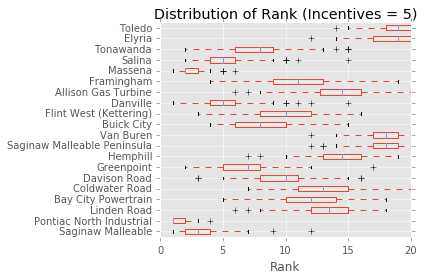

In [32]:

def plot_rank(_qualifiertext, _arr, _n, _wgts, _site_list):
    score_list = []
    for i in range(0, _n):
        score_list.append(pd.Series(data=np.sum(np.dot(_arr[:, :, i], _wgts), axis=1), index=[k for k in _site_list]).rank(ascending=False))
    scores = pd.DataFrame(score_list)

    # Plot as 10 historgrams of distribution of scores
    scores.boxplot(vert=0)
    plt.tight_layout()
    plt.xlabel('Rank')
    plt.title('Distribution of Rank (' + _qualifiertext + ')')
    plt.xticks([i for i in range(1,21)], rotation = 'vertical')
    plt.savefig('rank_boxplot' + _qualifiertext + '.pdf')
    plt.show()

def plot_score(_qualifiertext, _arr, _n, _wgts, _site_list):
    score_list = []
    for i in range(0, _n):
        score_list.append(pd.Series(data=np.sum(np.dot(_arr[:, :, i], _wgts), axis=1), index=[k for k in _site_list]))
    scores = pd.DataFrame(score_list)

    # Plot as 10 historgrams of distribution of scores
    scores.boxplot(vert=0)
    plt.tight_layout()
    plt.xlabel('Score')
    plt.title('Distribution of Scores (' + _qualifiertext + ')')
    plt.savefig('score_boxplot' + _qualifiertext + '.pdf')
    plt.show()

plot_rank('Incentives = 5', results_inc, N, wgts, site_list)



### Running graph_results.py